In [15]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)
train_df.head()


Train Shape: (576, 12)
Test Shape: (120, 12)


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [16]:
print(train_df.isnull().sum())
print(train_df.info())


profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #fol

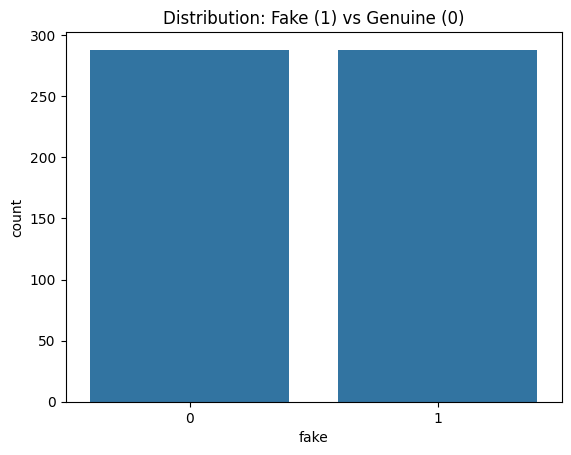

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='fake', data=train_df)
plt.title("Distribution: Fake (1) vs Genuine (0)")
plt.show()


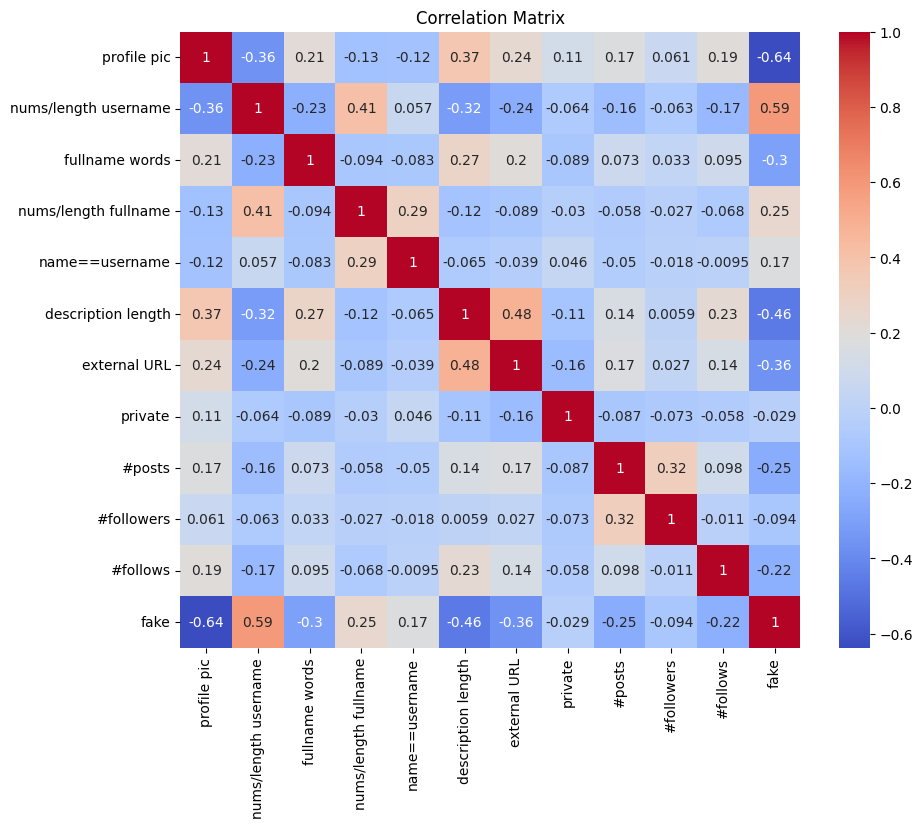

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


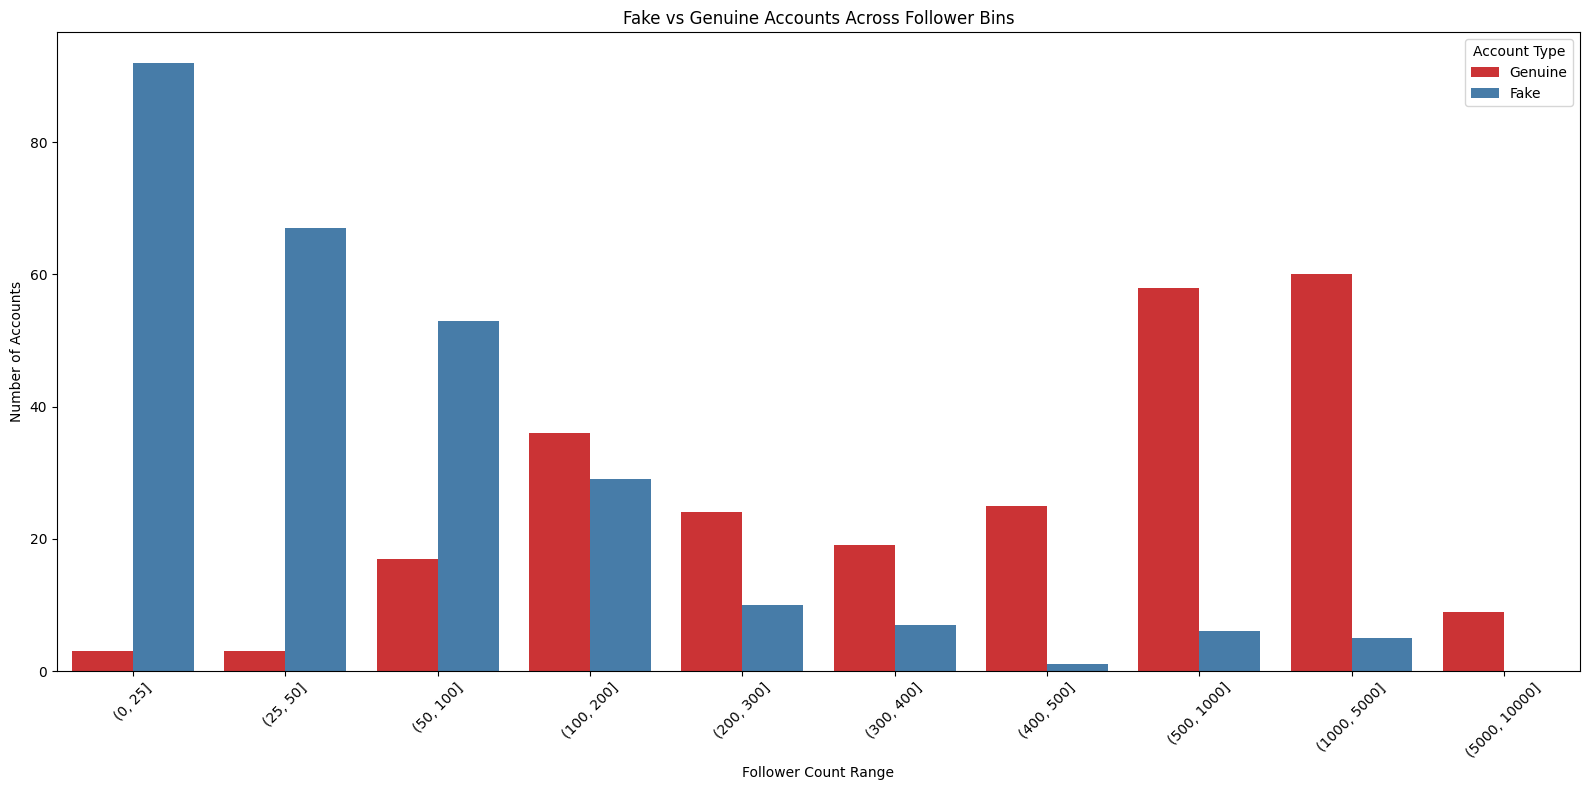

In [23]:
bins = [0, 25, 50, 100, 200, 300, 400, 500, 1000, 5000, 10000]
train_df['#followers_bins'] = pd.cut(train_df['#followers'], bins=bins)

plt.figure(figsize=(16, 8))
sns.countplot(x='#followers_bins', hue='fake', data=train_df, palette='Set1')
plt.xticks(rotation=45)
plt.title("Fake vs Genuine Accounts Across Follower Bins")
plt.xlabel("Follower Count Range")
plt.ylabel("Number of Accounts")
plt.legend(title='Account Type', labels=['Genuine', 'Fake'])
plt.tight_layout()
plt.show()



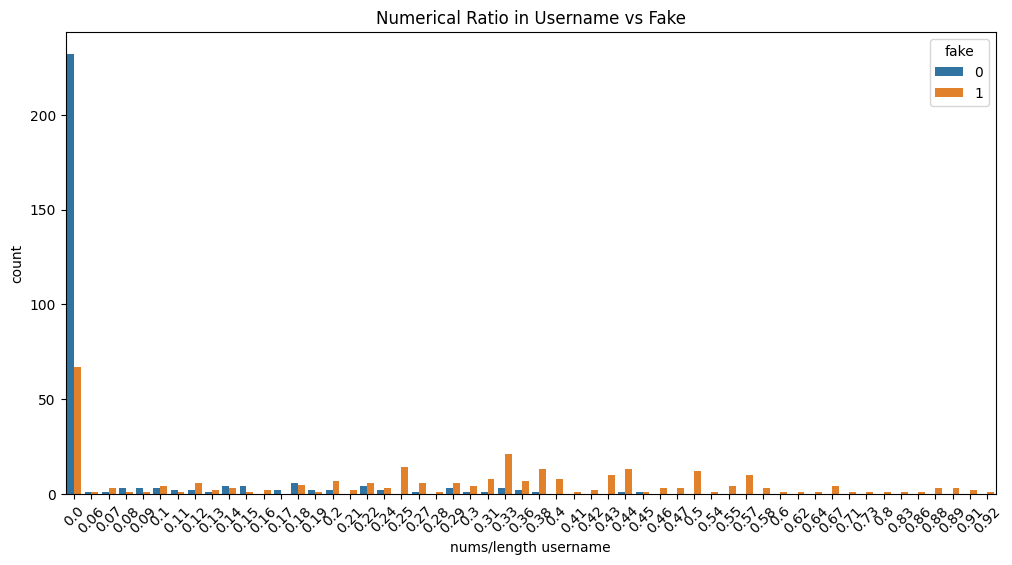

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(x='nums/length username', hue='fake', data=train_df)
plt.title("Numerical Ratio in Username vs Fake")
plt.xticks(rotation=45)
plt.show()


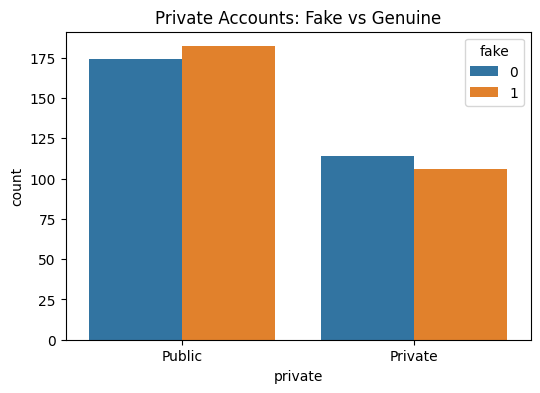

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='private', hue='fake', data=train_df)
plt.title("Private Accounts: Fake vs Genuine")
plt.xticks([0,1], ['Public', 'Private'])
plt.show()


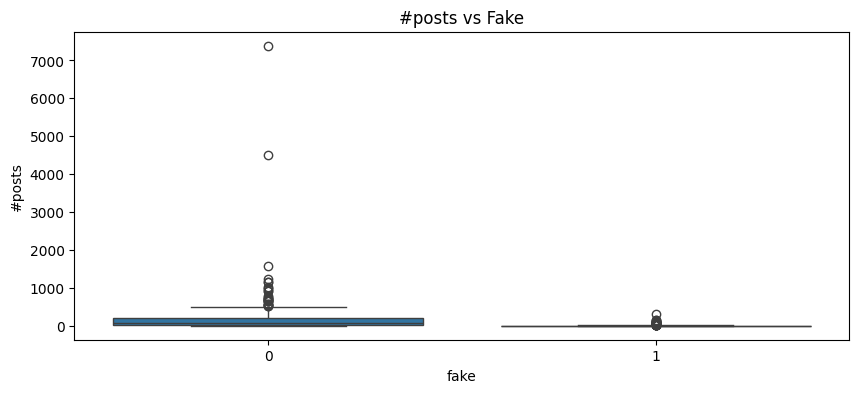

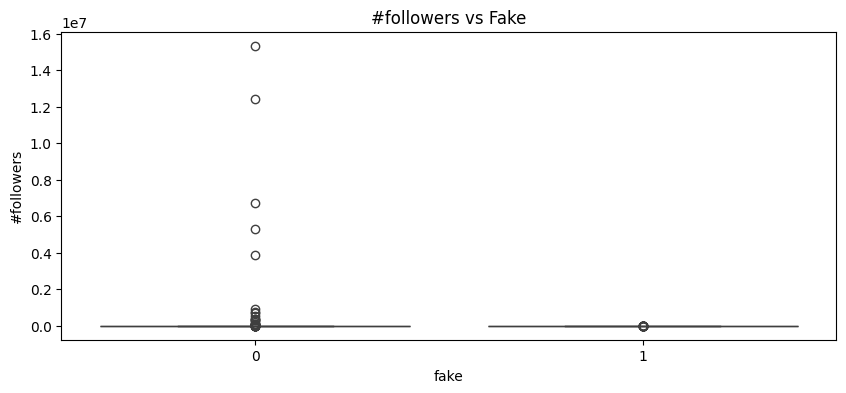

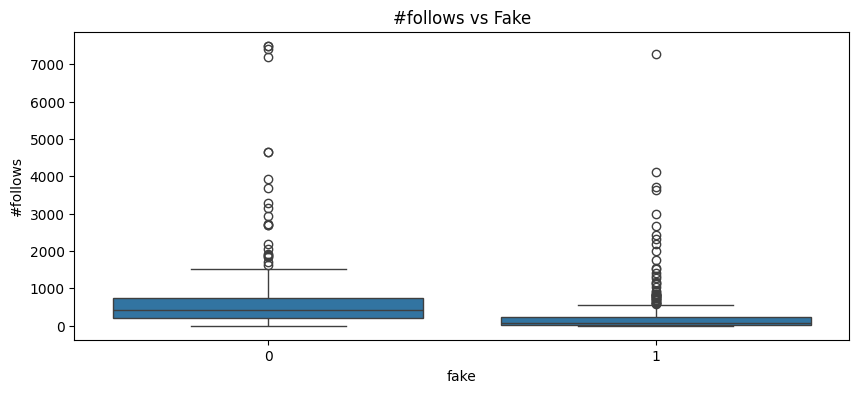

In [26]:
for col in ['#posts', '#followers', '#follows']:
    plt.figure(figsize=(10,4))
    sns.boxplot(x='fake', y=col, data=train_df)
    plt.title(f"{col} vs Fake")
    plt.show()


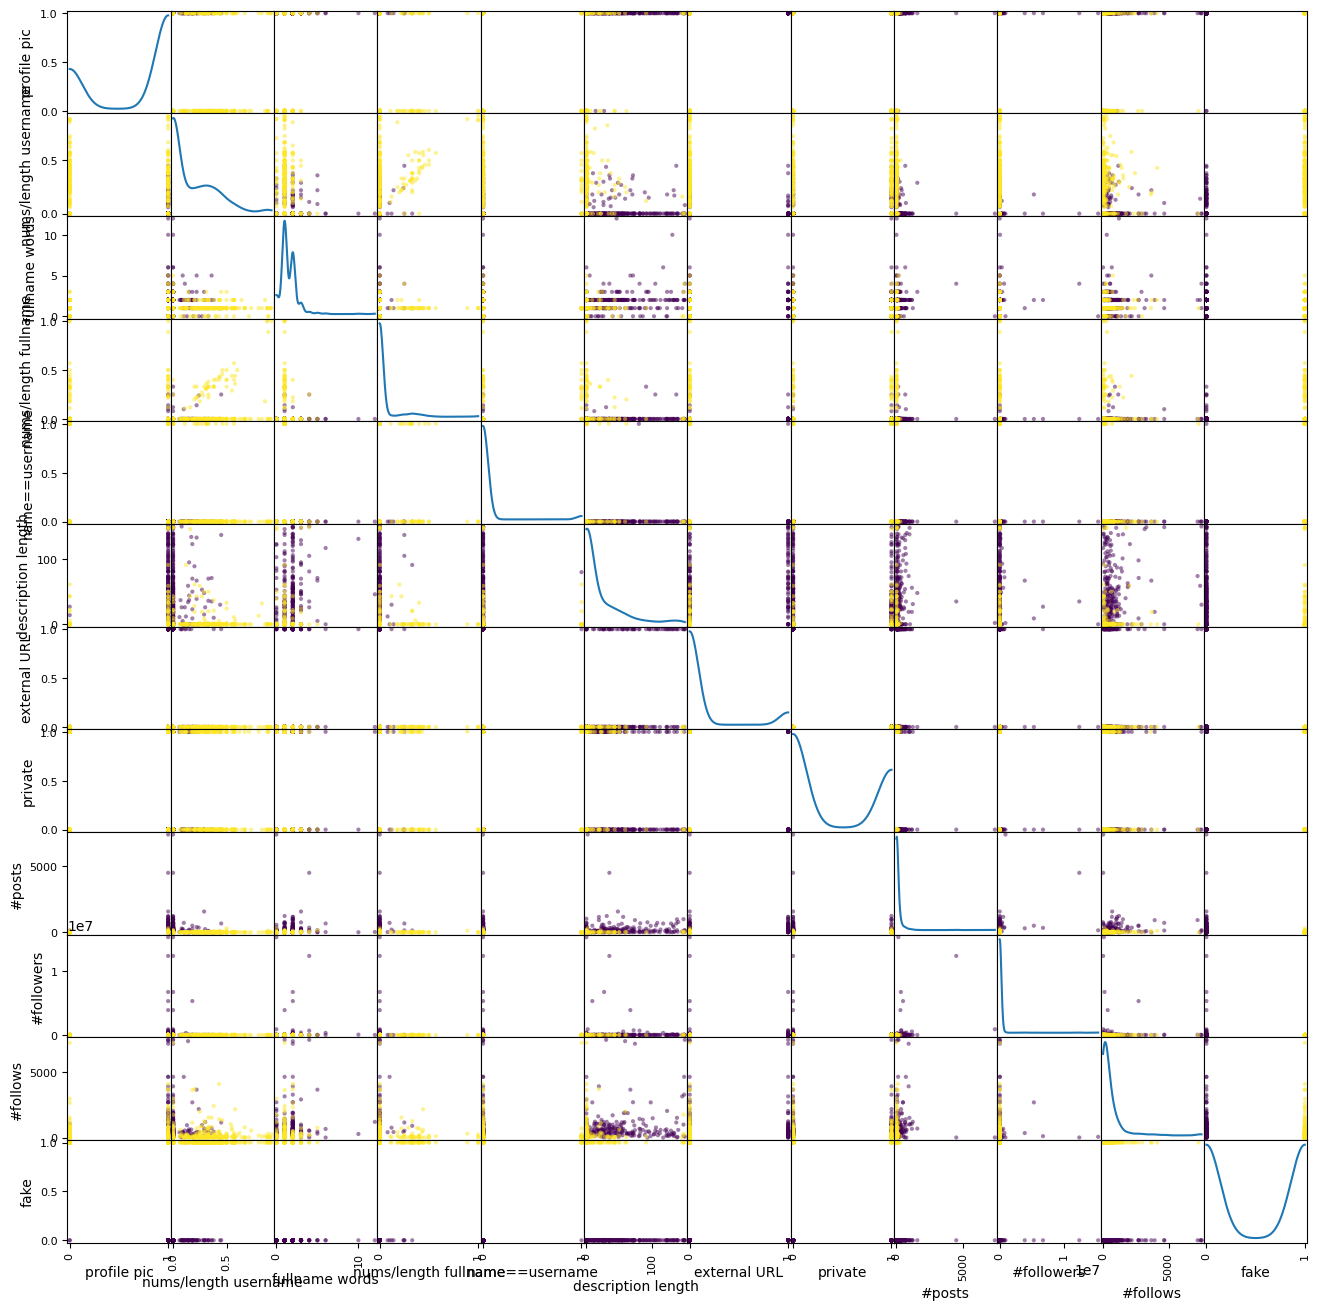

In [28]:
from pandas.plotting import scatter_matrix

scatter_matrix(train_df.drop(['#followers_bins'], axis=1), figsize=(16,16), diagonal='kde', c=train_df['fake'], cmap='viridis')
plt.show()


In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X = train_df.drop(['fake', '#followers_bins'], axis=1)
y = train_df['fake']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)

print("Validation Accuracy Report:\n")
print(classification_report(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


Validation Accuracy Report:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.88      0.83      0.85        53

    accuracy                           0.87       116
   macro avg       0.87      0.87      0.87       116
weighted avg       0.87      0.87      0.87       116

Confusion Matrix:
 [[57  6]
 [ 9 44]]


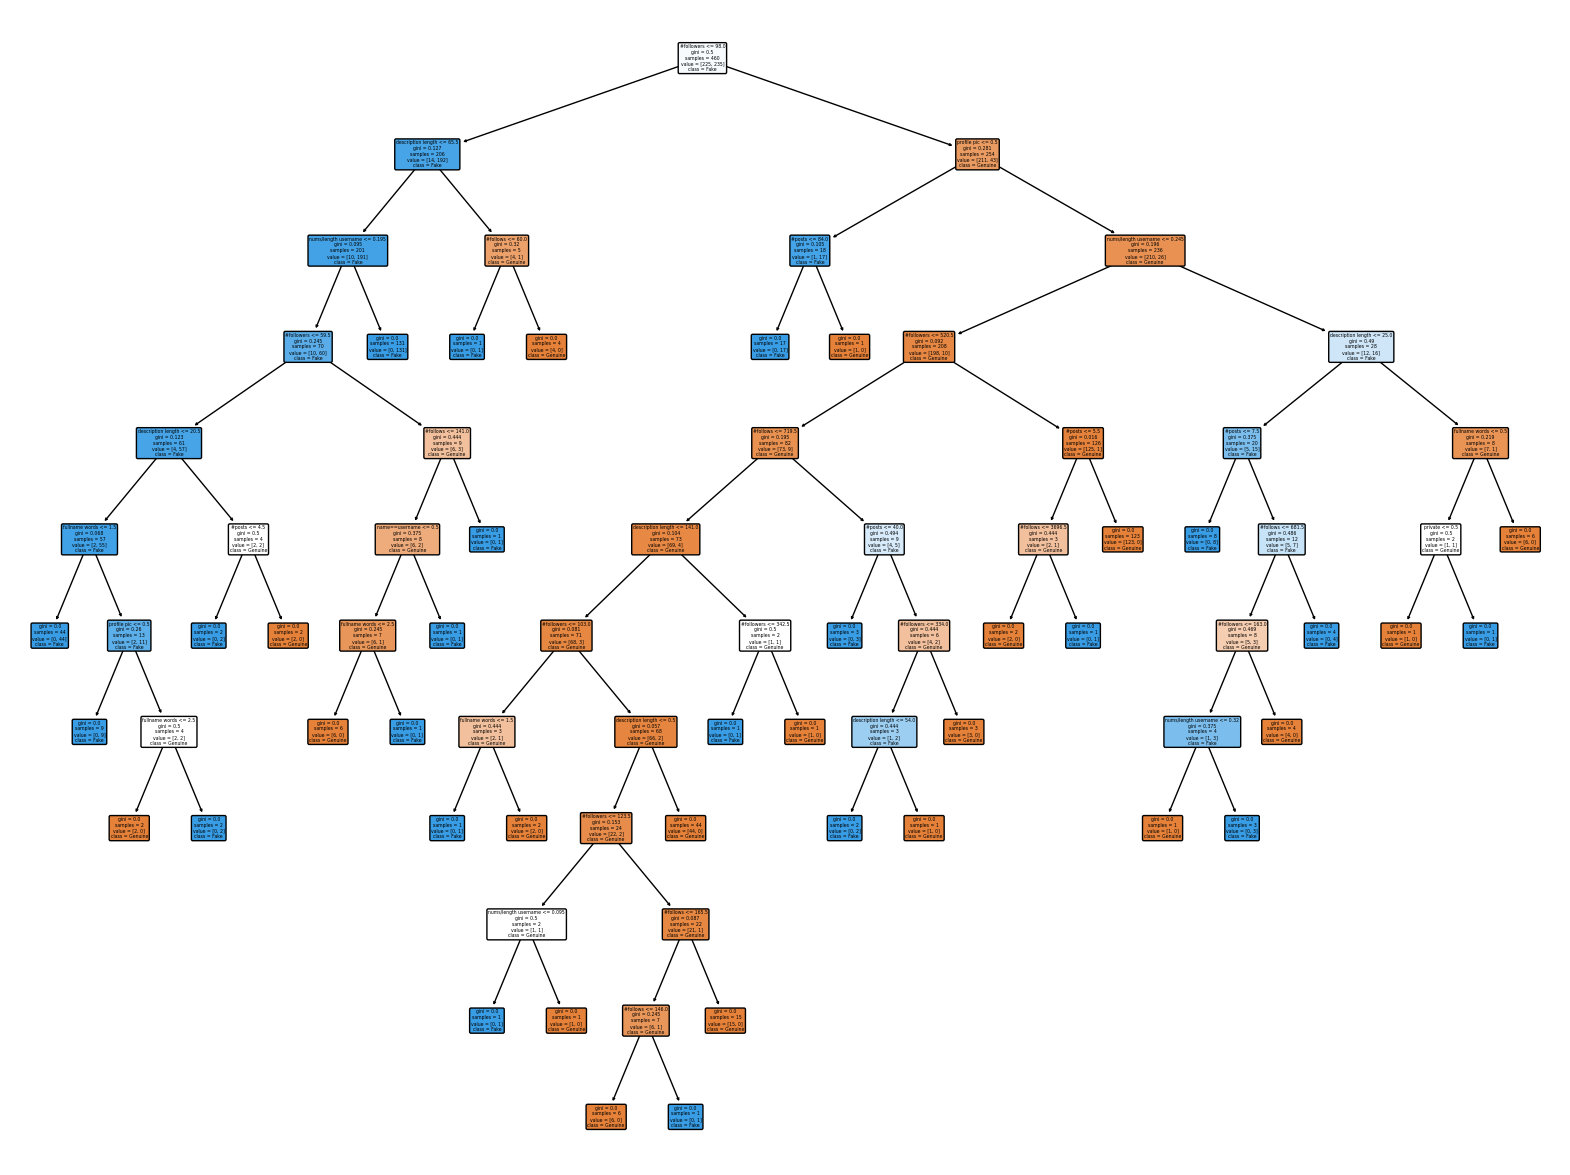

In [30]:
from sklearn import tree
plt.figure(figsize=(20, 15))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=['Genuine', 'Fake'], rounded=True)
plt.show()


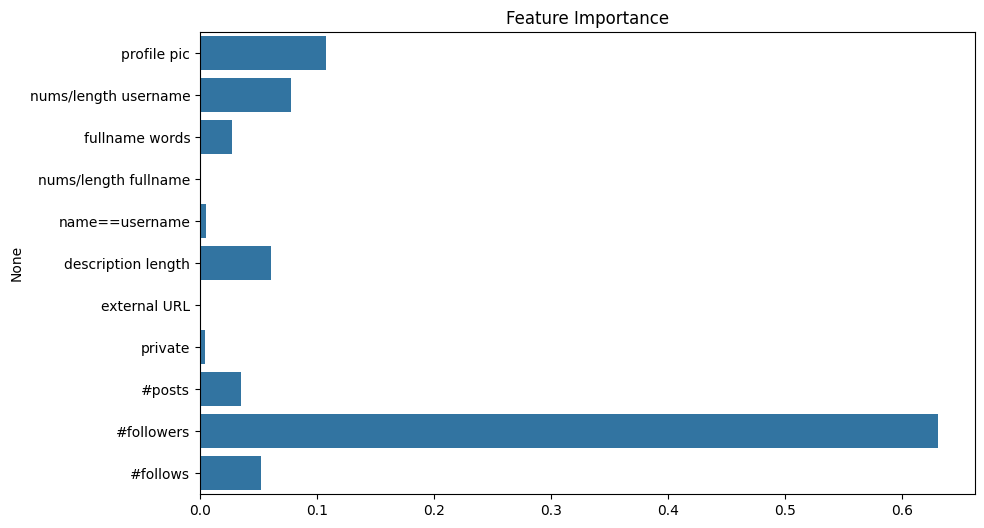

In [31]:
import numpy as np

plt.figure(figsize=(10,6))
importances = model.feature_importances_
sns.barplot(x=importances, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [32]:
X_test = test_df.drop('fake', axis=1)
y_test = test_df['fake']

y_test_pred = model.predict(X_test)

print("Test Accuracy Report:\n")
print(classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Accuracy Report:

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        60
           1       0.92      0.92      0.92        60

    accuracy                           0.92       120
   macro avg       0.92      0.92      0.92       120
weighted avg       0.92      0.92      0.92       120

Confusion Matrix:
 [[55  5]
 [ 5 55]]


In [33]:
test_df['predicted_fake'] = y_test_pred
test_df.to_csv('instagram_test_predictions.csv', index=False)
